## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

In [1]:
#1. Does an association exist between personality and handedness?
#2. Which questions of the personality questionaire are the best predictors of handedness?
#3. Does percentage of left-handedness vary by country? 

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split and cross validation 
from sklearn.model_selection import train_test_split

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
accuracy_score


In [3]:
#read data file separated by 'tab'
df = pd.read_csv('./data.csv', sep='\t')

In [4]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [5]:
df.shape

(4184, 56)

---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

#### Background research 
1. On average left-handed (L), who are 10% in a population, tend to
earn less than others is solely based on survey data
2. Data on personality, measured using the Big Five test, show, instead, that L are significantly more agreeable and L females
more extroverted
3. Scores in the Cognitive Reflection Test are not significantly different.

4. The percentage of L gradually increased from about 2% in 1900 to about 10% in 2000 in developed economies, it is lower in developing ones since L still tend to be forced to use the right hand while, in contrast, it is slightly higher for men, for twins and for prematurely
born children. In addition, studies testing consistency in hand use found negligible differences by handedness in primary actions, such as writing, throwing, matching and toothbrush.

5. When looking at differences in children’s ability by handedness, results are also mixed. 
Being L is associated with better school performance and leadership skills for boys and worse
ones for girls 
In contrast, it is also associated with worse learning, cognitive,social and language skills, driven by boys

6. Overall, mixed results on differencesin ability by handedness for both adults and children show that the relationship
between handedness and ability is age-invariant. This suggests that different learning trajectories, from childhood to adulthood, 
by handedness are not a relevant factor to explain the differences observed in the literature


7. Physiological differences correlated with handedness have been detected in medicalscience, with L showing a wider corpus callosum (CC)

Citation: Sartarelli M (2016) Handedness, Earnings, Ability and Personality. Evidence from the Lab. PLoS ONE 11(10): e0164412. doi:10.1371/
journal.pone.0164412

Truly ambidextrous people only make up about 1 percent of the population. People who have no dominant hand, and can use both hands with equal skill, are about 1 in 100, though many people who are left-handed can use their non-dominant hand nearly as well as their dominant one.
https://www.rd.com/list/facts-ambidextrous-people/

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

In [7]:
#Checking for missing values
df.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

In [8]:
# Exploring target variable 
df.hand.value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [9]:
#drop value of 0 bacause only small % of values and we are not clear on what 0 means. but we think it's likely a missing values.
#drop value of 3 because this study aims to predict right-handed or left-handed only
df= df[(df.hand !=0) & (df.hand !=3) ]
df.hand.value_counts(dropna = False)

1    3542
2     452
Name: hand, dtype: int64

In [10]:
#mapping right and left hand to 0 and 1
df['y'] = df['hand'].map({2:1, 1:0}) #0 = R, 1 = L
df.y.value_counts(dropna = False)

0    3542
1     452
Name: y, dtype: int64

In [11]:
#checking simple statistics
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Q1,3994.0,1.94,1.35,0.0,1.0,1.0,3.0,5.0
Q2,3994.0,3.83,1.55,0.0,3.0,5.0,5.0,5.0
Q3,3994.0,2.81,1.66,0.0,1.0,3.0,5.0,5.0
Q4,3994.0,3.16,1.48,0.0,2.0,3.0,4.0,5.0
Q5,3994.0,2.85,1.54,0.0,1.0,3.0,4.0,5.0
Q6,3994.0,3.68,1.34,0.0,3.0,4.0,5.0,5.0
Q7,3994.0,3.20,1.49,0.0,2.0,3.0,5.0,5.0
Q8,3994.0,3.18,1.39,0.0,2.0,3.0,4.0,5.0
Q9,3994.0,2.74,1.51,0.0,1.0,3.0,4.0,5.0
Q10,3994.0,3.53,1.24,0.0,3.0,4.0,5.0,5.0


### Calculate and interpret the baseline accuracy rate:

In [12]:
# baseline accuracy rate
df.y.value_counts(normalize = True)*100

0    88.683025
1    11.316975
Name: y, dtype: float64

In [ ]:
#Using baseline accuracy rate, you can predict that 88.7% of population are right-handed , 11.3% are left-handed

### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

In [ ]:
#Regression helps predict a continuous quantity or target variable
#Classification predicts discrete class labels or category

#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

In [ ]:
#smaller k ==> may lean to high variance ==> more chance of overfitting 
#higher k ==> may lean to high bias ==> more chance of underfitting 

#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

In [ ]:
#Because KNN is calculating the distance between neighbors, it's highly sensitive to the magnitude of each features.
#Thus, in order for KNN to work properly, it's important to scale the data. 

# Standardization (StandardScaler) ==> rescales values in the features columns to have each columns possess a mean of  zero and standard deviation of 1

#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

In [ ]:
#No, all answer of Q1- Q44 are in the same magnitutde or scale

#### How do we settle on $k$ for a $k$-nearest neighbors model?

In [ ]:
# K should not be too small or too large, optimal k ==> the sweet spot neither underfitting or overfitting and getting good prediction
#1. Start by default (K=5)
#2 We loop/iteration through a range og k options and select the optimal one based on scores.

#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

In [ ]:
#default=’l2’ which is Ridge regularization

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:

In [ ]:
# argument c - refer to an "inverse of alpha" (regularization parameter)
#c = 1/alpha
#if alpha = 1 c = 1
#if alpha = 0.1, c = 10

#higher c mean less regularization ==> can lead to more variance 
#lower c mean more regularization ==> can lead to lower variance 

In [ ]:
# general rule: dont regularize unless you need to ==> turn the penalty off 

#### Describe the relationship between regularization strength and the bias-variance tradeoff:

In [ ]:
#We regularize to avoid error due to high variance (overfitting)
#C is high ==> less regularization ==> more prone to overfitting 
#C is low ==> more regularization ==> less prone to overfitting 
#if overdone we could possibly get underfitting 

#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

In [ ]:
#Logistic regression has coefficients which easier to interpret. KNN is non-parametric and has no coefficients

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be 

In [13]:
#Assembly X and y variables 
X = df.iloc[:, 0:44]
y = df['y']

In [14]:
X.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44'],
      dtype='object')

In [15]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [16]:
#split and train our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify= y) 
#using stratify to deal with inbalance data ==classification only)

In [17]:
#Checking proportion of y_test and y_train data 
y_test.value_counts(normalize =True)*100

0    88.73592
1    11.26408
Name: y, dtype: float64

In [18]:
#Checking proportion of y_test and y_train data 
y_train.value_counts(normalize =True)*100

0    88.669797
1    11.330203
Name: y, dtype: float64

#### Create and fit four separate $k$-nearest neighbors models: one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$:

In [21]:
k_scores =pd.DataFrame(columns = ['k', 'train_score', 'test_score', 'preds_one'])
for n, k in enumerate ([3,5,15,25]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    minority_class_preds = y_preds == 1
    preds_one = pd.Series(minority_class_preds).sum()
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    k_scores.loc[n] = [k, train_score, test_score, preds_one]

In [22]:
k_scores

,k,train_score,test_score,preds_one
0,3.0,0.900469,0.857322,36.0
1,5.0,0.889828,0.886108,11.0
2,15.0,0.886698,0.887359,0.0
3,25.0,0.886698,0.887359,0.0


In [ ]:
#Swtiching k at 90/10 split made no significant difference in models predictive accuaracy 
#option, 
#oversampling the minority class
#undersampling the majority class
#A bit of both (SMOTE) ==> Synthetic minority over sampling technique
#algorithmically increase the  number of cases in your dataset in a more balance way

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [ ]:
# model 1 has the largest drop of scores from train to test data 
#No model is overfitting
#No model is underfitting either but the higher k test scores are the baseline accuracy score
#The models are good on majority class but bad on minority class
#The challenge here is not so much about algorithm but the imbalanced class split along with a tenuous likely relationship between X and y

---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as above.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify= y)

Accuracy score: 0.8868868868868869
Training score: 0.8868113522537563


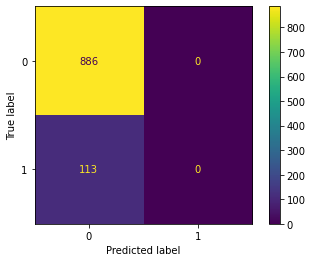

In [26]:
logreg = LogisticRegression(penalty='l1', C=1, solver='liblinear') #LASSO and  𝛼=1 c=1
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_).plot();
print(f'Accuracy score: {accuracy_score(y_test, y_preds)}')
print(f'Training score: {logreg.score(X_train, y_train)}')

Accuracy score: 0.8868868868868869
Training score: 0.8871452420701169


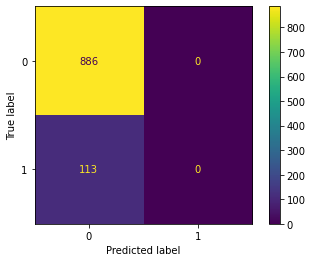

In [27]:
logreg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear') #LASSO and  𝛼=10 c =0.1
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_).plot();
print(f'Accuracy score: {accuracy_score(y_test, y_preds)}')
print(f'Training score: {logreg.score(X_train, y_train)}')

Accuracy score: 0.8868868868868869
Training score: 0.8868113522537563


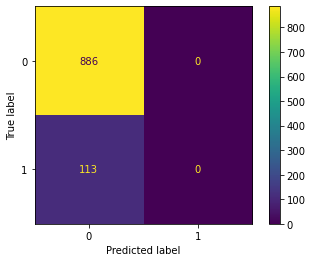

In [28]:
logreg = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000) #Ridge and  𝛼=1 c = 1
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_).plot();
print(f'Accuracy score: {accuracy_score(y_test, y_preds)}')
print(f'Training score: {logreg.score(X_train, y_train)}')

Accuracy score: 0.8868868868868869
Training score: 0.8868113522537563


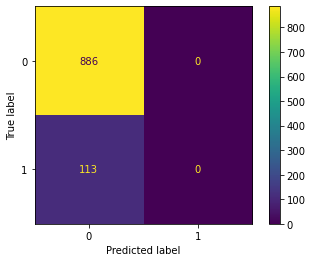

In [29]:
logreg = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000) #Ridge and  𝛼=10 
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_).plot();
print(f'Accuracy score: {accuracy_score(y_test, y_preds)}')
print(f'Training score: {logreg.score(X_train, y_train)}')

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [ ]:
#No model makes a prediction of  left-handed at all. 
#All models have the same performance and their scores are the baseline accuracy score
#No model is overfittingo or underfitting. 

---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? What are the "best" models?

In [ ]:
# No, almost all models have the same performance level and their scores are close to the baseline accuracy score